In [85]:
import numpy as np
import matplotlib.pyplot as plt 

In [86]:
def initialize(n_x, n_h1, n_h2, n_y):
    # n_x is size of input layer, n_h1(2)is # of hidden layer 1(2) units,n_y is # of output layer units
    np.random.seed(1)
    w1 = np.random.rand(n_h1, n_x) * 0.01 #weight1
    b1 = np.zeros((n_h1, 1))  #bias1
    w2 = np.random.rand(n_h2, n_h1) * 0.01 #weight
    b2 = np.zeros((n_h2, 1))  #bias2
    w3 = np.random.rand(n_y, n_h2) * 0.01 #weight
    b3 = np.zeros((n_y, 1))  #bias3
    
    parameters = {"w1": w1, "b1": b1, "w2": w2, "b2": b2, "w3": w3, "b3": b3}
    
    return parameters

In [87]:
def forward(x, parameters):
    w1 = parameters["w1"]
    b1 = parameters["b1"]
    w2 = parameters["w2"]
    b2 = parameters["b2"]
    w3 = parameters["w3"]
    b3 = parameters["b3"]
    
    z1 = np.dot(w1, x) + b1
    a1 = np.maximum(0, z1) #relu
    z2 = np.dot(w2, a1) + b2
    a2 = np.maximum(0, z2) #relu
    z3 = np.dot(w3, a2) + b3
    a3 = 1 / (1 + np.exp(-z3)) #sigmoid
    
    cache = {"z1": z1, "a1": a1, "z2": z2, "a2": a2, "z3": z3, "a3": a3}
    
    return a3, cache

In [64]:
def compute_cost(a3, y, parameters):
    m = y.shape[1] #numbers of class
    cost = (-np.dot(y, np.log(a3).T) - np.dot(1-y, np.log(1 - a3).T)) / m
    cost = np.squeeze(cost)
    return cost

In [88]:
def backward(parameters, cache, x, y):
    m = x.shape[1]
    
    w1 = parameters["w1"]
    w2 = parameters["w2"]
    w3 = parameters["w3"]
    a1 = cache["a1"]
    a2 = cache["a2"]
    a3 = cache["a3"]
    z1 = cache["z1"]
    z2 = cache["z2"]
    z3 = cache["z3"]
    #output layer -> hidden layer 2
    da3 = -(np.divide(y, a3) - np.divide((1-y), (1-a3))) / m  #p(c/a3)  
    dz3 = (1 / (1 + np.exp(-z3))) * (1 - 1/(1+np.exp(-z3))) #p(a3/z3)
    pz3 = da3 * dz3 #p(c/z3) = p(c/a3)p(a3/z3)
    
    pb3 = 1/m * np.sum(pz3, axis=1, keepdims=True)  #p(c/b3) = p(c/z3)p(z3/b3) = p(c/z3) (p(z3/b3) = 1)
    dw3 = a2  #p(z3/w3)
    pw3 = np.dot(pz3,dw3.T) #p(c/w3) = p(c/z3)p(z3/w3)
    
    #hidden layer 2 -> hidden layer 1
    da2 = w3  #p(z3/a2)
    pa2 = np.dot(da2.T,pz3)  #p(c/a2) = p(z3/a2)p(c/z3)
    pz2 = np.array(pa2, copy=True)   
    pz2[z2 <= 0] = 0                #p(c/z2) = p(c/a2)p(a2/z2)   p(a2/z2) =1 if z2 > 0 or =0 else
    pb2 = 1/m * np.sum(pz2, axis=1, keepdims=True)  #p(c/b2) = p(c/z2)p(z2/b2) = p(c/z2) (p(z2/b2) = 1)
    dw2 = a1  #p(z2/w2)
    pw2 = np.dot(pz2,dw2.T) #p(c/w2) = p(z2/w2)p(c/z2)
    #hidden layer 1 -> input layer 
    da1 = w2  #p(z2/a1)
    pa1 = np.dot(da1.T,pz2) #p(c/a1) = p(z2/a1)p(c/z2)
    pz1 = np.array(pa1, copy=True)  
    pz1[z1 <= 0] = 0                #p(c/z1) = #p(c/a1)p(a1/z1)    p(a1/z1) =1 if z1 > 0 or =0 else
    pb1 = 1/m * np.sum(pz1, axis=1, keepdims=True)  #p(c/b1) = p(c/z1)p(z1/b1) = p(c/z1) (p(z1/b1) = 1)
    dw1 = x  #p(z1/w1)
    pw1 = np.dot(pz1,dw1.T) #p(c/w1) = p(c/z1)p(z1/w1)
    
    grads = {"pw1": pw1, "pb1": pb1, "pw2": pw2, "pb2": pb2, "pw3": pw3, "pb3": pb3}
    return grads

In [89]:
def update(parameters, grads, learning_rate = 0.07):
    w1 = parameters["w1"]
    b1 = parameters["b1"]
    w2 = parameters["w2"]
    b2 = parameters["b2"]
    w3 = parameters["w3"]
    b3 = parameters["b3"]
    
    pw1 = grads["pw1"]
    pw2 = grads["pw2"]
    pw3 = grads["pw3"]
    pb1 = grads["pb1"]
    pb2 = grads["pb2"]
    pb3 = grads["pb3"]
    
    w1 = w1 - learning_rate * pw1
    b1 = b1 - learning_rate * pb1
    w2 = w2 - learning_rate * pw2
    b2 = b2 - learning_rate * pb2
    w3 = w3 - learning_rate * pw3
    b3 = b3 - learning_rate * pb3
    
    
    parameters = {"w1": w1, "b1": b1, "w2": w2, "b2": b2, "w3": w3, "b3": b3}
    
    return parameters

In [90]:
def nn_model(x, y, n_h1, n_h2, num_iterations = 5000, learning_rate = 0.08,print_cost = False):
    np.random.seed(1)
    n_x = x.shape[0]
    n_y = y.shape[0]
    costs = []
    parameters = initialize(n_x, n_h1, n_h2, n_y)
    
    for i in range(num_iterations):
        a3 ,cache = forward(x, parameters)
        cost = compute_cost(a3, y, parameters)
        grads = backward(parameters, cache, x, y)
        parameters = update(parameters, grads)
        if i % 500 == 0:
            costs.append(cost)
            if print_cost:
                print("cost after iterations {}: {}".format(i, cost))
    print("cost after iterations {}: {}".format(i, cost))
    costs.append(cost)
    
    plt.figure(num=1, figsize=(8,5))
    plt.semilogy(costs)
    plt.xlabel("iterations")
    plt.ylabel("cost")
    plt.title("learning rate = " + str(learning_rate))
    plt.show
    
    return parameters

In [91]:
def predict(x, y, parameters):
    m = x.shape[1]
    n = len(parameters) // 2
    p = np.zeros((1,m))
    
    probas, cache = forward(x, parameters)
    
    for i in range(probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    print("accuracy: " + str(np.sum((p == y)/m)))
    
    return p

In [106]:
#######################TEST#######################################
data = pd.read_csv('./test.csv', encoding = 'utf-8')
a = data.iloc[:,1].to_numpy().reshape(418,1)  #Pclass
b = data.iloc[:,3:7].to_numpy()  #Sex, Age, SibSp, Parch, Ticket

c = data.iloc[:,8].to_numpy().reshape(418,1) #Fare
cabin = data.iloc[:,9].to_numpy().reshape(418,1)  #Cabin

for j in range(cabin.shape[0]): 
    if cabin[j,0] is not np.nan:
        cabin[j,0] = 2
    else:
        cabin[j,0] = 1
    

d = data.iloc[:,10].to_numpy().reshape(418,1)  #Embarked


train = np.concatenate([a,b,c,cabin,d],axis = 1)
train[train == 'male'] = 1
train[train == 'female'] = 2
train[train == 'S'] = 1
train[train == 'C'] = 2
train[train == 'Q'] = 3

train = train.astype ('float32')

for i in range(train.shape[1]):
    col = train[:,i]
    col[np.isnan(col)] = 1

print(train.shape)
#print(train)
print(train.T.shape)
#print(train.T)
k=predictions_train = predicttest(train.T, parameters_bp)
print(k)

(418, 8)
(8, 418)
[[0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1.
  1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1.
  1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0.
  0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0.
  1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1.
  1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
  1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1.
  1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1.
  1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1.
  0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
  1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0.
  1. 0. 1. 1. 1. 1. 

In [105]:
##################test_predict##############################
def predicttest(x, parameters):
    m = x.shape[1]
    n = len(parameters) // 2
    p = np.zeros((1,m))
    
    probas, cache = forward(x, parameters)
    
    for i in range(probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    

    
    return p

In [103]:
##################test_predict##############################
def predicttest(x, parameters):
    m = x.shape[1]
    n = len(parameters) // 2
    p = np.zeros((1,m))
    
    probas, cache = forward(x, parameters)
    
    p = probas
    

    
    return p

In [92]:
import numpy as np
import pandas as pd
import tensorflow as tf
import torch
from tensorflow.keras.layers import Dropout
from tensorflow.keras import utils
#from tensorflow.keras.utils import np_utils
data = pd.read_csv('./train.csv', encoding = 'utf-8')

In [94]:

a = data.iloc[:,2].to_numpy().reshape(891,1)  #Pclass
b = data.iloc[:,4:8].to_numpy()  #Sex, Age, SibSp, Parch, Ticket

c = data.iloc[:,9].to_numpy().reshape(891,1) #Fare
cabin = data.iloc[:,10].to_numpy().reshape(891,1)  #Cabin

for j in range(cabin.shape[0]): 
    if cabin[j,0] is not np.nan:
        cabin[j,0] = 2
    else:
        cabin[j,0] = 1
    

d = data.iloc[:,11].to_numpy().reshape(891,1)  #Embarked
train_label = data.iloc[:,1]

train = np.concatenate([a,b,c,cabin,d],axis = 1)
train[train == 'male'] = 1
train[train == 'female'] = 2
train[train == 'S'] = 1
train[train == 'C'] = 2
train[train == 'Q'] = 3

train = train.astype ('float32')

for i in range(train.shape[1]):
    col = train[:,i]
    col[np.isnan(col)] = 1
    
train_label = train_label.to_numpy()
train_label = train_label
train_label = train_label.astype ('float32').reshape(1,-1)
print(train.shape)
print(train)
print(train.T.shape)
print(train.T)
print(train_label)
print(train_label.shape)

(891, 8)
[[ 3.      1.     22.     ...  7.25    2.      1.    ]
 [ 1.      2.     38.     ... 71.2833  2.      2.    ]
 [ 3.      2.     26.     ...  7.925   2.      1.    ]
 ...
 [ 3.      2.      1.     ... 23.45    2.      1.    ]
 [ 1.      1.     26.     ... 30.      2.      2.    ]
 [ 3.      1.     32.     ...  7.75    2.      3.    ]]
(8, 891)
[[ 3.      1.      3.     ...  3.      1.      3.    ]
 [ 1.      2.      2.     ...  2.      1.      1.    ]
 [22.     38.     26.     ...  1.     26.     32.    ]
 ...
 [ 7.25   71.2833  7.925  ... 23.45   30.      7.75  ]
 [ 2.      2.      2.     ...  2.      2.      2.    ]
 [ 1.      2.      1.     ...  1.      2.      3.    ]]
[[0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1.
  0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1.
  0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.
  0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 1. 0. 

cost after iterations 0: 0.6931468976295604
cost after iterations 249: 0.6857935108625064


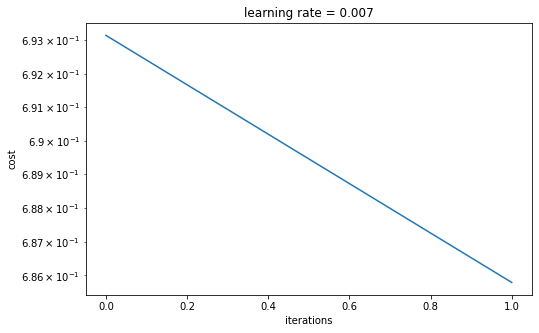

In [95]:
parameters_bp = nn_model(train.T, train_label, 12,6, num_iterations=250, learning_rate=0.007, print_cost=True)

In [96]:
print("Training accuracy:")
predictions_train = predict(train.T, train_label, parameters_bp)

Training accuracy:
accuracy: 0.5735129068462402


In [97]:
data.iloc[:,2].to_numpy()

array([3, 1, 3, 1, 3, 3, 1, 3, 3, 2, 3, 1, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2,
       3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 3, 2, 1, 1, 3, 3, 3, 3, 3, 2, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 1, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3,
       2, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 2, 3, 3, 3,
       1, 3, 3, 3, 1, 3, 3, 3, 1, 1, 2, 2, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 3, 3, 3, 3, 2, 1, 3, 2, 3, 2, 2, 1, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 2, 2, 1, 1, 3, 1, 3, 3, 3, 3, 2, 2, 3, 3, 2, 2, 2, 1, 3, 3,
       3, 1, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1, 3,
       3, 1, 2, 3, 3, 2, 3, 2, 3, 1, 3, 1, 3, 3, 2, 2, 3, 2, 1, 1, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 1, 3, 2, 1, 2,
       3, 2, 3, 3, 1, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 3,
       2, 3, 3, 1, 3, 2, 1, 2, 3, 3, 1, 3, 3, 3, 1, 1, 1, 2, 3, 3, 1, 1,
       3, 2, 3, 3, 1, 1, 1, 3, 2, 1, 3, 1, 3, 2, 3, 3, 3, 3, 3, 3, 1, 3,
       3, 3, 2, 3, 1, 1, 2, 3, 3, 1, 3, 1, 1, 1, 3,